<a href="https://colab.research.google.com/github/celefigs/collaborative_project/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Context Introduction

recoleccion de datos, etc

## Importing Libraries and Reading the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

import nltk

from nltk.corpus import stopwords

from wordcloud import WordCloud

# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('punkt_tab')
# nltk.download('stopwords')

In [25]:
file_path = '../data/drugsComTrain.csv'

drug_data_df=pd.read_csv(file_path)

drug_data_df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [26]:
# #colab

# drug_data_df=pd.read_csv('/drugsComTrain.csv')

# drug_data_df.head()


## Initial DataFrame Exploration

In [27]:
drug_data_df.shape

(161297, 7)

In [28]:
drug_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


In [29]:
#remove column "UniqueID"

drug_data_df=drug_data_df.drop(columns=['uniqueID'])

drug_data_df.head(2)

,drugName,condition,review,rating,date,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192


## Data Cleaning

In [30]:
#lower for clarification

drug_data_df.columns = drug_data_df.columns.str.lower()

**Filtering Relevant Conditions**

In [31]:
#search related words in a "condition" column and create a new DataFrame with only the relevant conditions

pattern = r'birth|birth control|contraceptive methods|birth control pills|birth control devices|family planning'

filtered_df = drug_data_df[drug_data_df['condition'].str.contains(pattern, case=False, na=False)]

filtered_df.head()

,drugname,condition,review,rating,date,usefulcount
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
9,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1
14,Nexplanon,Birth Control,"""Started Nexplanon 2 months ago because I have...",3,7-Aug-14,10
22,Etonogestrel,Birth Control,"""Nexplanon does its job. I can have worry free...",9,11-Aug-14,11


In [32]:
#cuantas condiciones tenemos? also, in this step reduce the rows in 129846

formatted_conditions = ', '.join(filtered_df['condition'].unique())

print(f"The related conditions are: {formatted_conditions}")

The related conditions are: Birth Control


In [33]:
filtered_df.duplicated().sum() #if had---> drop dupl

0

In [34]:
#buscar nan values

nan_values = filtered_df.isna().sum()

print(nan_values)

drugname       0
condition      0
review         0
rating         0
date           0
usefulcount    0
dtype: int64


## Summary Statistics: Numeric and Categorical

**Summary statistics for numerical columns**

In [35]:
filtered_df.describe().T

# rating: 6,27 media;
# std	3.33-> means diversity;
# rating goes from 1 to 10;

,count,mean,std,min,25%,50%,75%,max
rating,28788.0,6.089933,3.305941,1.0,3.0,7.0,9.0,10.0
usefulcount,28788.0,7.792344,17.673734,0.0,2.0,5.0,9.0,1247.0


Rating

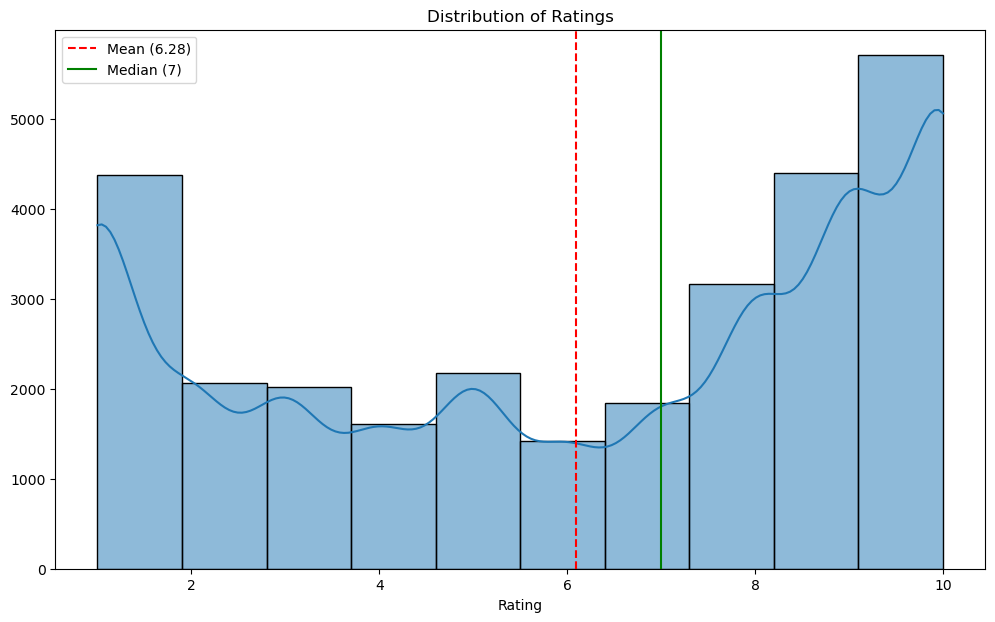

In [36]:
# Rating:  this graphic help us to explain  the 2nd and 3rd cuartiles

plt.figure(figsize=(12, 7))

sns.histplot(filtered_df['rating'], bins=10, kde=True)

plt.axvline(x=filtered_df['rating'].mean(), color='red', linestyle='--', label='Mean (6.28)')
plt.axvline(x=filtered_df['rating'].median(), color='green', linestyle='-', label='Median (7)')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('')
plt.legend()
#plt.grid()



find out about over rating, rating vs bad reviews

Useful Count

- Range goes from 0 to 1247, indicating that some reviews received a high number of useful votes while others were not considered useful at all.
- Approximately 3.96% of reviews are deemed useful
- 75% of reviews received 9 or fewer useful votes, indicating that many reviews fall within a lower utility range
- High variability in useful votes suggests that reviews are perceived quite differently; some receive numerous useful votes while others do not, reflecting differences in quality, relevance, or style.

#I didn't create a graph because it's hard for me to explain it

**Summary statistics for categorical columns**

In [37]:
filtered_df.describe(exclude='number').T

,count,unique,top,freq
drugname,28788,172,Etonogestrel,3314
condition,28788,1,Birth Control,28788
review,28788,18133,"""Was on Junel Fe and it worked according to my...",4
date,28788,3077,22-Sep-15,42


**Top 5 Most Used Drugs**

In [38]:
#top 5 drugName
#top_5_used_drugs = filtered_df['drugname'].value_counts().sort_values(ascending=False).head(5)

top_5_used_drugs = filtered_df['drugname'].value_counts().nlargest(5)

top_5_used_drugs

drugname
Etonogestrel                          3314
Ethinyl estradiol / norethindrone     2337
Nexplanon                             2149
Levonorgestrel                        2129
Ethinyl estradiol / levonorgestrel    1600
Name: count, dtype: int64

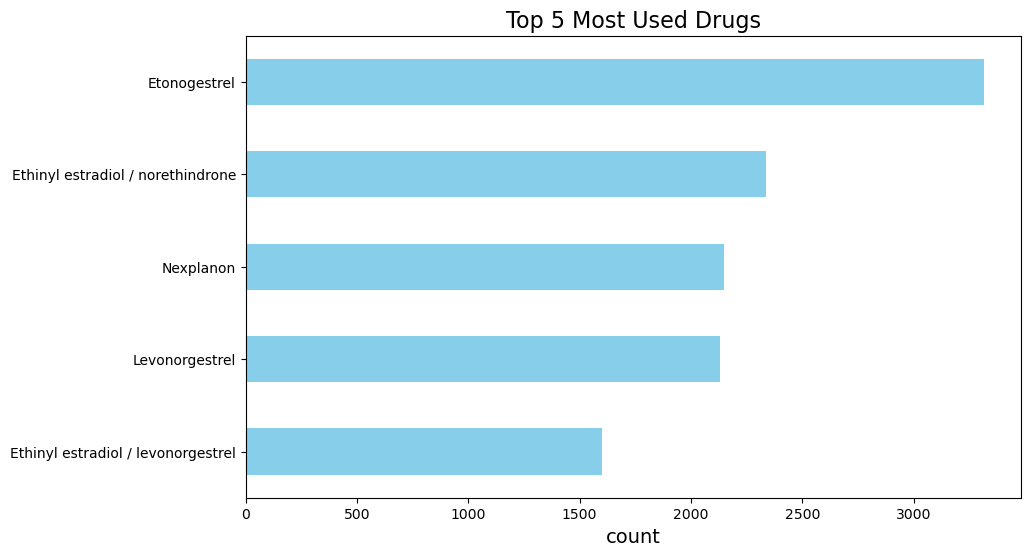

In [39]:
import matplotlib.pyplot as plt


top_5_used_drugs = filtered_df['drugname'].value_counts().nlargest(5).sort_values(ascending= True)

plt.figure(figsize=(10, 6))
top_5_used_drugs.plot(kind='barh', color='skyblue')
plt.title('Top 5 Most Used Drugs', fontsize=16)
plt.xlabel('count', fontsize=14)
plt.ylabel('')

#plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [40]:
#I would like to create a visualization of the top 5 drugs vs average ratings of each,
# #I've tried using groupby and haven't been able to d oit

In [41]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Celeste\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
# segregation for analysis Top 5
# Levonorgestrel
# Etonogestrel
# Ethinyl estradiol / norethindrone
# Nexplanon
# Ethinyl estradiol / levonorgestrel


levonorgestrel_reviews = filtered_df[filtered_df['drugname'] == 'Levonorgestrel']['review'].tolist()
etonogestrel_reviews = filtered_df[filtered_df['drugname'] == 'Etonogestrel']['review'].tolist()
ethinyl_estradiol_nore_reviews = filtered_df[filtered_df['drugname'] == 'Ethinyl estradiol / norethindrone']['review'].tolist()
nexplanon_reviews = filtered_df[filtered_df['drugname'] == 'Nexplanon']['review'].tolist()
ethinyl_estradiol_levo_reviews = filtered_df[filtered_df['drugname'] == ' Ethinyl estradiol / levonorgestrel']['review'].tolist()



In [43]:
stops = set(stopwords.words('english'))

# #wordcloud_levonogestrel = WordCloud(background_color="white", width=800, height=400, stopwords=stopwords).generate(levonorgestrel_reviews)
# wordcloud_levonorgestrel = WordCloud(background_color="black", width=800, height=400, stopwords=stops).generate(" ".join(levonorgestrel_reviews))

# # Plott the word cloud
# plt.figure(figsize=(15, 10))
# plt.imshow(wordcloud_levonorgestrel, interpolation='bilinear')
# plt.axis("off")


In [44]:
# wordcloud_etenogestrel = WordCloud(background_color="black", width=800, height=400, stopwords=stops).generate(" ".join(etonogestrel_reviews))

# # Plott the word cloud
# plt.figure(figsize=(15, 10))
# plt.imshow(wordcloud_etenogestrel, interpolation='bilinear')
# plt.axis("off")

(-0.5, 799.5, 399.5, -0.5)

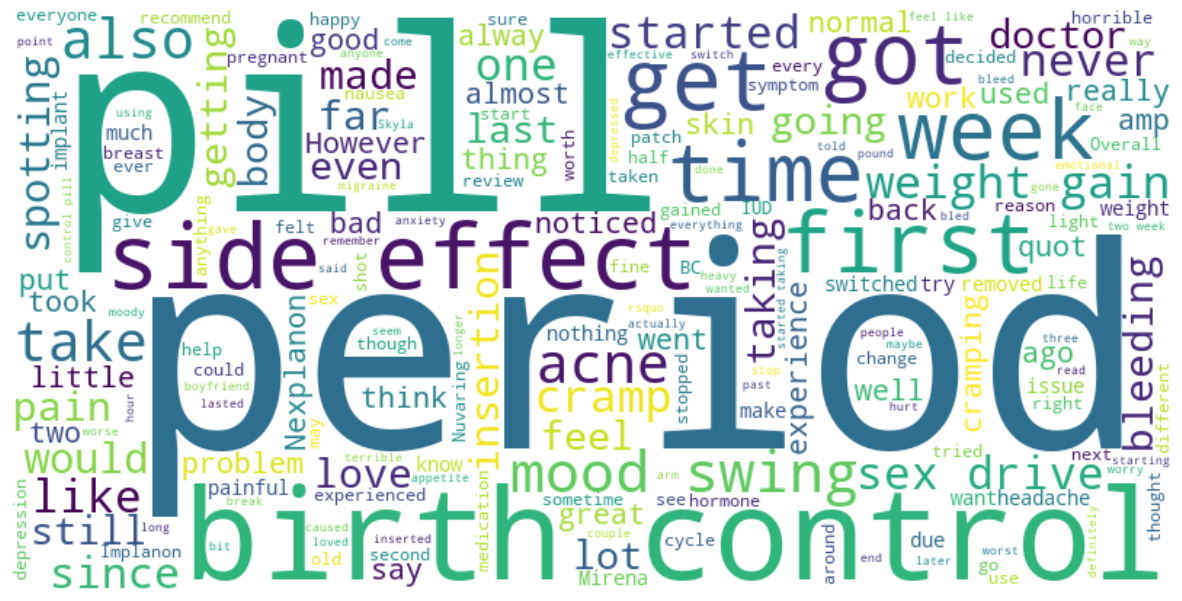

In [45]:
temporary_stops = stops.union(['day', 'month', 'year', 'days', 'months', 'years'])

wordcloud_review = WordCloud(background_color="white", width=800, height=400, stopwords=temporary_stops).generate(" ".join(filtered_df['review']))

# Plott the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_review, interpolation='bilinear')
plt.axis("off")

In [46]:
difference_temp_stops = temporary_stops.difference(stops)
print("Elements in temporary_stops but not in stops:", difference_temp_stops)


Elements in temporary_stops but not in stops: {'month', 'day', 'year', 'months', 'years', 'days'}
